# Deep Learning Lab Assignment 5.2

**Course Name:** PEC Deep Learning

**Lab Title:** Sequence Text Prediction using LSTM

**Student Name:** Suraj Didwagh

**Student ID:** 202201040126

**Date of Submission:** 14/04/25

**Group Members**:
1. Shriram Savant
2. Prathamesh Galugade
3. Punit Kawadkar

# Part I: Paper and Dataset Selection

## 1.1 Research Paper Identification

**Objective:**  
Choose a research paper that illustrates LSTM for sequence prediction.

**Chosen Research Paper:**  
[Generating Sequences with Recurrent Neural Networks](https://arxiv.org/abs/1308.0850) by Alex Graves.

**Summary:**  
The paper presents an in-depth exploration of using LSTM networks for sequence generation. Key points include:

- **Core Approaches:**  
  The use of deep LSTM architectures to learn complex dependencies in sequential data and generate new content by predicting subsequent elements.

- **Network Architecture:**  
  The paper introduces multi-layer LSTM networks that can capture long-term dependencies effectively, making them suitable for tasks like handwriting synthesis and text generation.

- **Training Strategy:**  
  Training is performed using backpropagation through time (BPTT) with precautions such as gradient clipping to handle exploding gradients, and dropout to reduce overfitting.

- **Evaluation Metrics:**  
  The primary metric is cross-entropy loss, which quantifies the difference between the predicted and actual distributions, along with qualitative analysis of the generated sequences.

**Justification for Selection:**  
This paper is seminal in applying LSTMs for sequence prediction and provides a robust methodology that directly aligns with our project objectives. Its detailed exploration of network design and training techniques makes it a valuable reference for implementing and analyzing our own LSTM-based text prediction model.

## 1.2 Dataset Selection

**Chosen Dataset:**  
Shakespeare’s Text from TensorFlow Datasets

**Dataset Description:**  
This dataset is a curated collection of texts from the works of William Shakespeare. Its diverse and rich language structure makes it well suited for sequence prediction tasks, where the goal is to generate coherent and contextually relevant text.

**Online Source/Link:**  
[Shakespeare Dataset on TensorFlow Datasets](https://www.tensorflow.org/datasets/catalog/tiny_shakespeare)

**Downloading/Loading Procedure:**  
In Part III, we will detail the step-by-step instructions and the code to load this dataset using the `tensorflow_datasets` library. This typically involves importing the library, using the `tfds.load` function, and exploring the dataset’s contents.

---


# Part II: Environment Setup

## 2.1 Software and Libraries Setup

**Objective:**  
Set up your Python environment using a Jupyter Notebook or Python script with the necessary libraries required for the project. The key libraries include TensorFlow/Keras, NumPy, Matplotlib, and TensorFlow Datasets among others.

**Steps and Deliverables:**  
- Create a `requirements.txt` file to record all dependencies.
- Document the installation commands and versions of libraries used.
- Ensure that the environment can support GPU acceleration (if available) to speed up model training.

**Notes:**  
The following libraries should be installed:
- TensorFlow (which includes Keras)
- NumPy
- Matplotlib
- TensorFlow Datasets

For example, using pip the installation command would be similar to:  
```bash
pip install tensorflow numpy matplotlib tensorflow-datasets


In [ ]:
%%bash
cat <<EOF > requirements.txt
tensorflow>=2.5.0
numpy>=1.19.5
matplotlib>=3.3.4
tensorflow-datasets>=4.0.0
EOF


In [ ]:
!pip install -r requirements.txt


# Part III: Data Loading and Preprocessing

## 3.1 Data Downloading/Loading

**Objective:**  
Download and load the chosen dataset (Shakespeare’s Text) using TensorFlow Datasets.

**Tasks:**  
- Use the `tensorflow_datasets` library to load the Shakespeare dataset (we use the “tiny_shakespeare” variant available on TensorFlow Datasets).
- Verify that the dataset is loaded properly.
- Provide code that demonstrates the downloading/loading process and prints essential dataset information.

**Deliverable:**  
A code snippet that downloads and loads the dataset with detailed comments explaining each step.

---

## 3.2 Data Exploration

**Objective:**  
Explore and visualize the dataset to understand its structure and properties.

**Tasks:**  
- Display a sample of the texts from the dataset.
- Calculate and print the total length of the text corpus.
- Compute basic statistics such as the vocabulary size, and display the vocabulary.
- Optionally, visualize key aspects of the data (e.g., a histogram of word lengths).

**Deliverable:**  
Code (with output) demonstrating the exploration of the dataset.

---

## 3.3 Data Preprocessing

**Objective:**  
Prepare the raw text data for model training by converting it into a suitable numerical format.

**Tasks:**  
- Clean the text data if needed.
- Implement tokenization (we demonstrate character-level tokenization).
- Create a mapping from tokens to indices and vice versa.
- Convert the entire text corpus into its integer representation.
- Generate input-output sequences for training the LSTM model (using a fixed sequence length).
- Define a small helper function to split each sequence into the input sequence and its corresponding target sequence.

**Deliverable:**  
A data preprocessing pipeline implemented as functions with detailed comments and code snippets.

---

**Integration Note:**  
Ensure that these steps build directly on the environment and setup established in Parts I and II, so that the loaded and processed dataset can be directly used for model building in subsequent parts.


###Data Downloading

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf

# Load the tiny_shakespeare dataset from TensorFlow Datasets
ds, ds_info = tfds.load('tiny_shakespeare', with_info=True, as_supervised=False)
print(ds_info)

# The dataset is a tf.data.Dataset containing a single text file.
# Concatenate all text entries into one string
shakespeare_text = ""
for example in ds['train']:
    # Each example is a dictionary; 'text' key contains the raw Shakespeare text
    shakespeare_text += example['text'].numpy().decode('utf-8') + "\n"

print("Length of Shakespeare corpus:", len(shakespeare_text))


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/tiny_shakespeare/incomplete.0XW0DK_1.0.0/tiny_shakespeare-train.tfrecord*.…

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/tiny_shakespeare/incomplete.0XW0DK_1.0.0/tiny_shakespeare-validation.tfrec…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/tiny_shakespeare/incomplete.0XW0DK_1.0.0/tiny_shakespeare-test.tfrecord*..…

Dataset tiny_shakespeare downloaded and prepared to /root/tensorflow_datasets/tiny_shakespeare/1.0.0. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='tiny_shakespeare',
    full_name='tiny_shakespeare/1.0.0',
    description="""
    40,000 lines of Shakespeare from a variety of Shakespeare's plays. Featured in
    Andrej Karpathy's blog post 'The Unreasonable Effectiveness of Recurrent Neural
    Networks': http://karpathy.github.io/2015/05/21/rnn-effectiveness/.
    
    To use for e.g. character modelling:
    
    ```
    d = tfds.load(name='tiny_shakespeare')['train']
    d = d.map(lambda x: tf.strings.unicode_split(x['text'], 'UTF-8'))
    # train split includes vocabulary for other splits
    vocabulary = sorted(set(next(iter(d)).numpy()))
    d = d.map(lambda x: {'cur_char': x[:-1], 'next_char': x[1:]})
    d = d.unbatch()
    seq_len = 100
    batch_size = 2
    d = d.batch(seq_len)
    d = d.batch(batch_size)
    ```
    """,
    homepage='https://githu

###Data Exploration

Sample text from the Shakespeare corpus:
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor
Vocabulary size: 65
Vocabulary: ['\n', ' ', '!', '$', '&', "'", ',', '-', '.', '3', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


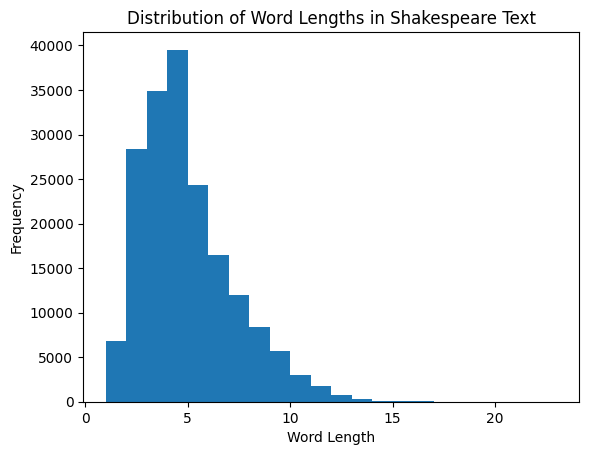

In [ ]:
# Display a sample of the text corpus
print("Sample text from the Shakespeare corpus:")
print(shakespeare_text[:500])  # print the first 500 characters

# Build the vocabulary by identifying all unique characters in the text
vocab = sorted(set(shakespeare_text))
print("Vocabulary size:", len(vocab))
print("Vocabulary:", vocab)

# (Optional) Visualize a histogram of word lengths in the corpus
import matplotlib.pyplot as plt
words = shakespeare_text.split()
plt.hist([len(word) for word in words], bins=range(1, max(len(word) for word in words) + 1))
plt.title("Distribution of Word Lengths in Shakespeare Text")
plt.xlabel("Word Length")
plt.ylabel("Frequency")
plt.show()


###Data Preprocessing

In [ ]:
import numpy as np

# Create a mapping from characters to indices (character-level tokenization)
token_to_index = {char: i for i, char in enumerate(vocab)}
index_to_token = np.array(vocab)

# Convert the entire text into an array of integers based on the mapping
text_as_int = np.array([token_to_index[c] for c in shakespeare_text])
print("Integer representation sample:", text_as_int[:20])

# Define a sequence length for input and target text pairs
seq_length = 100
examples_per_epoch = len(shakespeare_text) // seq_length

# Create a TensorFlow dataset from the integer representation
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

# Batch the data into sequences of seq_length+1 (input + target)
sequences = char_dataset.batch(seq_length + 1, drop_remainder=True)

# Function to split each sequence into input and target parts
def split_input_target(chunk):
    input_text = chunk[:-1]   # all characters except the last one
    target_text = chunk[1:]   # all characters except the first one
    return input_text, target_text

# Map the split function to each sequence in the dataset
dataset = sequences.map(split_input_target)

# Check one example from the processed dataset
for input_example, target_example in dataset.take(1):
    print("Input sequence sample:", input_example.numpy())
    print("Target sequence sample:", target_example.numpy())


Integer representation sample: [18 47 56 57 58  1 15 47 58 47 64 43 52 10  0 14 43 44 53 56]
Input sequence sample: [18 47 56 57 58  1 15 47 58 47 64 43 52 10  0 14 43 44 53 56 43  1 61 43
  1 54 56 53 41 43 43 42  1 39 52 63  1 44 59 56 58 46 43 56  6  1 46 43
 39 56  1 51 43  1 57 54 43 39 49  8  0  0 13 50 50 10  0 31 54 43 39 49
  6  1 57 54 43 39 49  8  0  0 18 47 56 57 58  1 15 47 58 47 64 43 52 10
  0 37 53 59]
Target sequence sample: [47 56 57 58  1 15 47 58 47 64 43 52 10  0 14 43 44 53 56 43  1 61 43  1
 54 56 53 41 43 43 42  1 39 52 63  1 44 59 56 58 46 43 56  6  1 46 43 39
 56  1 51 43  1 57 54 43 39 49  8  0  0 13 50 50 10  0 31 54 43 39 49  6
  1 57 54 43 39 49  8  0  0 18 47 56 57 58  1 15 47 58 47 64 43 52 10  0
 37 53 59  1]


# Part IV: Model Implementation

## 4.1 Model Design

**Objective:**  
Design an LSTM network for sequence prediction. For our character-level text generation, the network will include:
- **Embedding Layer:** Converts input integers (each representing a character) into dense vectors. Although we're using character-level data, an embedding layer can help capture relationships in a lower-dimensional space.
- **LSTM Layers:** One or more LSTM layers are used to capture sequential dependencies. We have chosen to include two LSTM layers. The first LSTM layer passes its output as a sequence to the next LSTM layer. A dropout layer is included to prevent overfitting.
- **Dense Output Layer:** A fully connected (Dense) layer projects the LSTM outputs back to the dimensionality of the vocabulary, producing a probability distribution over the next character using a softmax activation.

**Architecture Summary:**  
1. **Input:** Sequences of integer-encoded characters.
2. **Embedding Layer:** Transforms input integers to dense vectors.
3. **First LSTM Layer:** Processes sequences and returns full sequences.
4. **Dropout Layer:** Regularizes and prevents overfitting.
5. **Second LSTM Layer:** Further processes the sequential data.
6. **Dense Layer:** Outputs logits for each character in the vocabulary.

This design is both simple and effective for sequence prediction tasks as described in the selected research paper.

---

## 4.2 Model Building

**Objective:**  
Implement the LSTM model using TensorFlow/Keras. The code builds the model with:
- An Embedding layer,
- Two LSTM layers (with dropout in between),
- A Dense output layer.

**Deliverable:**  
Fully commented code that defines the model architecture.

---

## 4.3 Model Compilation and Configuration

**Objective:**  
Configure the training process by setting the loss function, optimizer, and metrics.
- **Loss Function:** We use sparse categorical crossentropy, as the targets are integer labels.
- **Optimizer:** Adam optimizer is chosen for efficient training.
- **Metrics:** Typically, we monitor training loss, but you may add additional metrics if needed.

**Deliverable:**  
A concise code snippet showing how the model is compiled.

---

**Integration:**  
This part integrates seamlessly with Parts I-III. The model inputs will be taken from the preprocessed data (character sequences obtained in Part III). The vocabulary size from Part III determines the output dimensions of the Dense layer. In the following code snippets, replace placeholder values (such as the vocabulary size and embedding dimensions) with those computed during preprocessing.


###Model Building

In [ ]:
import tensorflow as tf
from tensorflow.keras import Input, Model, layers

# Ensure you have set the following variables from previous parts:
# BATCH_SIZE, vocab_size, embedding_dim, rnn_units
# Assuming `vocab` is a sorted list of unique characters built in Part III.
vocab_size = len(vocab)

# Hyperparameters for the model
embedding_dim = 256  # Dimensionality for embedding layer
rnn_units = 512      # Number of units in the LSTM layers
BATCH_SIZE = 64      # Batch size for training

# Define the input with fixed batch shape for stateful models
inputs = Input(batch_shape=(BATCH_SIZE, None), dtype=tf.int32)

# Embedding layer: transforms input integers to dense vectors
x = layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim)(inputs)

# First LSTM layer: processes sequences and returns full sequences
x = layers.LSTM(rnn_units, return_sequences=True, stateful=True, recurrent_initializer='glorot_uniform')(x)

# Dropout layer for regularization
x = layers.Dropout(0.2)(x)

# Second LSTM layer: further processes the sequential data
x = layers.LSTM(rnn_units, return_sequences=True, stateful=True, recurrent_initializer='glorot_uniform')(x)

# Dense output layer: outputs logits for each character in the vocabulary
outputs = layers.Dense(vocab_size)(x)

# Build the model
model = Model(inputs, outputs)

# Display the model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (64, None)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (64, None, 256)        │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (64, None, 512)        │     1,574,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (64, None, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (64, None, 512)        │     2,099,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (64, None, 65)         │        33,345 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,724,097 (14.21 MB)

 Trainable params: 3,724,097 (14.21 MB)

 Non-trainable params: 0 (0.00 B)

### Model Compilation and Configuration

In [ ]:
# Compile the model with an appropriate loss function and optimizer
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

# Optionally, print a confirmation that the model is compiled
print("Model compiled with Adam optimizer and SparseCategoricalCrossentropy loss.")


Model compiled with Adam optimizer and SparseCategoricalCrossentropy loss.


# Part V: Training and Evaluation

## 5.1 Training Setup

**Objective:**  
Define the training configuration by setting hyperparameters (batch size, number of epochs, sequence length, etc.) and preparing the training dataset.

**Tasks:**
- Set key hyperparameters such as `BATCH_SIZE`, `BUFFER_SIZE`, and `EPOCHS`.
- Ensure that the preprocessed dataset (from Part III) is correctly shuffled and batched to meet the stateful requirements.
- Confirm that all batches maintain the fixed batch size.

**Deliverable:**  
A code snippet that configures the dataset for training, including batching and shuffling steps.

---

## 5.2 Model Training

**Objective:**  
Train the stateful LSTM model on the preprocessed dataset, and monitor performance using training logs and callbacks.

**Tasks:**
- Use the `model.fit()` method to initiate training.
- Implement callbacks such as:
  - **ModelCheckpoint:** Save the best model weights based on the training loss.
  - **EarlyStopping:** Halt training early if the loss does not improve for a specified number of epochs.
- Track and display training logs and metrics.

**Deliverable:**  
A code snippet that performs model training along with the callbacks, and displays the training logs/metrics.

---

## 5.3 Evaluation and Text Generation

**Objective:**  
Evaluate the model's performance by generating text sequences from a given seed input.

**Tasks:**
- Implement a text generation function that:
  - Accepts a seed string.
  - Resets the model’s state.
  - Iteratively predicts the next character using the trained stateful model.
  - Samples from the probability distribution (e.g., using categorical sampling) to form the next character.
- Display the generated text to assess model performance.

**Deliverable:**  
A code snippet that generates a text sequence using the trained model and outputs the generated text.

---

**Integration Note:**  
This Part V builds seamlessly on Parts I–IV by using the preprocessed dataset and the stateful LSTM model (from the Functional API) defined earlier. The training code, along with the callbacks, ensures that the model is effectively trained, and the text generation function demonstrates the model's learned capabilities.


### Training Setup – Dataset Preparation and Batching

In [ ]:
# Set up key hyperparameters
BATCH_SIZE = 64      # Must match the fixed batch size for the stateful model
BUFFER_SIZE = 10000  # Buffer size for shuffling the dataset
EPOCHS = 20          # Number of training epochs

# Re-batch the preprocessed dataset (from Part III) for training purposes.
# 'dataset' is assumed to be the mapped dataset of (input, target) pairs created in Part III.
train_dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

print("Training dataset prepared with batch size =", BATCH_SIZE)


Training dataset prepared with batch size = 64


### Model Training

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define callbacks for training:
checkpoint_callback = ModelCheckpoint(
    filepath='./model_checkpoint.weights.h5',
    save_weights_only=True,
    save_best_only=True,
    monitor='loss',
    verbose=1
)

early_stopping_callback = EarlyStopping(
    monitor='loss',
    patience=3,
    verbose=1
)

# Train the model using the fit() method
history = model.fit(
    train_dataset,
    epochs=EPOCHS,
    callbacks=[checkpoint_callback, early_stopping_callback]
)

print("Model training completed.")


Epoch 1/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 3.1550
Epoch 1: loss improved from inf to 2.75138, saving model to ./model_checkpoint.weights.h5
155/155 ━━━━━━━━━━━━━━━━━━━━ 15s 56ms/step - loss: 3.1525
Epoch 2/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 2.1291
Epoch 2: loss improved from 2.75138 to 2.04080, saving model to ./model_checkpoint.weights.h5
155/155 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 2.1286
Epoch 3/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 1.8355
Epoch 3: loss improved from 2.04080 to 1.79597, saving model to ./model_checkpoint.weights.h5
155/155 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 1.8352
Epoch 4/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 1.6873
Epoch 4: loss improved from 1.79597 to 1.66484, saving model to ./model_checkpoint.weights.h5
155/155 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 1.6871
Epoch 5/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 1.5957
Epoch 5: loss improved from 1.66484 to 1.58407, saving m

### Text Generation Function (Evaluation)

In [ ]:
import numpy as np
import tensorflow as tf

def reset_model_states(model):
    """
    Reset the states of all stateful layers in the model.
    """
    for layer in model.layers:
        if hasattr(layer, 'reset_states'):
            layer.reset_states()

def generate_text(model, start_string, generation_length=100, batch_size=64):
    """
    Generate text using a stateful model built with the Functional API.

    Args:
      model: The trained stateful LSTM model.
      start_string: The seed string to initiate text generation.
      generation_length: Number of characters to generate.
      batch_size: The fixed batch size that the stateful model expects.

    Returns:
      A string containing the generated text based on the seed.
    """
    # Convert the seed string into numerical token indices
    seed_indices = [token_to_index[s] for s in start_string]

    # Replicate the seed across the batch size so that the input shape matches the model's fixed batch dimension.
    input_eval = tf.tile(tf.expand_dims(seed_indices, 0), [batch_size, 1])  # shape: (batch_size, len(seed))

    # Update the model's internal state by running the seed through the model
    _ = model(input_eval)

    # Set input_eval to the last token of the seed for starting generation
    input_eval = tf.tile(tf.expand_dims([seed_indices[-1]], 0), [batch_size, 1])

    # Reset generated_text (we will only record predictions from the first sample)
    generated_text = []

    # Reset the states of all stateful layers before generation
    reset_model_states(model)

    for _ in range(generation_length):
        # Obtain predictions. Expected output shape: (batch_size, 1, vocab_size)
        predictions = model(input_eval)

        # Use the first row for sampling the next token
        predictions = predictions[0, 0, :]  # shape: (vocab_size,)

        # Sample the next token using a multinomial distribution
        predicted_id = tf.random.categorical(tf.expand_dims(predictions, 0), num_samples=1)[0, 0].numpy()

        # Append the predicted token for the first batch instance to our generated text
        generated_text.append(index_to_token[predicted_id])

        # Prepare the next input: replicate the predicted token across the batch dimension
        input_eval = tf.tile(tf.expand_dims([predicted_id], 0), [batch_size, 1])

    return start_string + ''.join(generated_text)

# Example usage:
seed_text = "ROMEO: "
generated_text = generate_text(model, seed_text, generation_length=300, batch_size=BATCH_SIZE)
print("Generated Text:\n", generated_text)


Generated Text:
 ROMEO: in the oath
Hell the desires of flatterition.

PRINCE EDWARD:
And I'll come and desbandly, now Isabel,
Thou wilt unprosperits the Tower, to thy, morn throne;
Thou art his folks, which not her dear, and not good speaks it in the
fronces for God and all as mine own your exide.
I'll keep butchers to fi


# Part VI: Analysis and Discussion

## 6.1 Model Analysis

**Objective:**  
Analyze the training curves and overall model performance to determine whether the model is learning appropriately and converging. Compare the generated text outcomes with the expected behavior described in the research paper.

**Discussion Points:**
- **Training Curves:**  
  Describe the behavior of the loss curve over the training epochs. Discuss if and how the loss decreased over time and whether the model reached convergence. If available, include plots of training loss (and accuracy, if tracked).
  
- **Generated Text Comparison:**  
  Evaluate the quality of the generated text by comparing it with sample outputs from the research paper. Discuss whether the generated text captures the style, vocabulary, and sequential coherence of the target dataset (Shakespeare’s text).
  
- **Model Behavior:**  
  Reflect on any observed overfitting or underfitting during training. Analyze if adjustments in hyperparameters (such as dropout rate, number of LSTM units, etc.) might improve convergence.
  
- **Alternative Models:**  
  Consider a brief comparison with alternative architectures such as BiLSTM (Bidirectional LSTM). While the primary focus is on the LSTM model, note any potential benefits or drawbacks that a bidirectional approach may offer in capturing context for text generation.

**Deliverable:**  
A written analysis section that includes:
- A discussion of the training loss (and accuracy, if available).
- Interpretation of the generated text samples.
- A comparison with alternative model architectures where applicable.

---

## 6.2 Limitations and Future Work

**Objective:**  
Critically evaluate the current implementation, identify its limitations, and suggest potential improvements and future research directions.

**Discussion Points:**
- **Limitations:**  
  - Discuss potential issues such as data quality, model complexity, and training time.
  - Mention any observed shortcomings in the generated text quality (e.g., lack of coherence, repetitive patterns).
  - Address possible overfitting or underfitting situations encountered during training.
  
- **Future Work:**  
  - Propose enhancements such as testing with a more complex model (e.g., upgrading to BiLSTM networks) or incorporating additional regularization techniques.
  - Suggest exploring different tokenization strategies (character-level vs. word-level) to improve text generation quality.
  - Recommend applying further hyperparameter tuning and experimenting with more advanced architectures (like Transformer-based models) for future iterations.

**Deliverable:**  
A bullet-point list or a written paragraph summarizing the limitations and outlining future work directions for enhancing the current implementation.

---

**Integration Note:**  
This analysis section builds on the training and evaluation results obtained in Part V. Use the plots generated (from the code snippet below) for visual support and reference these in your written discussion. Be sure to include all observations and insights in your final project documentation.


### Plotting Training Curves

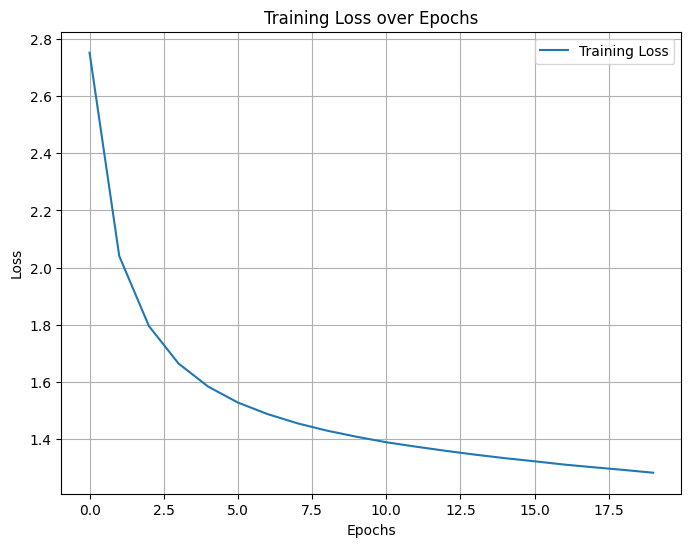

In [ ]:
import matplotlib.pyplot as plt

# Assuming the training history is stored in the 'history' variable from Part V
loss = history.history['loss']
epochs_range = range(len(loss))

plt.figure(figsize=(8, 6))
plt.plot(epochs_range, loss, label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# Part VII: Demonstration and Documentation

## 7.1 Code Documentation and Comments

**Objective:**  
Ensure that all code is well-documented and easy to understand. This includes:
- Including inline comments throughout the code.
- Adding detailed docstrings for each function and class.
- Explaining the purpose and logic behind major code blocks.

**Deliverable:**  
Fully commented code in your repository. This is essential for readability and to help others (or future you) understand the implementation details.

---

## 7.2 Visualizations

**Objective:**  
Visualize key performance metrics and model predictions to support your analysis.

**Tasks:**
- Generate plots showing training (and validation, if applicable) loss and accuracy over epochs.
- Create additional plots to compare real versus generated text samples.
- Save these plots and include screenshots in your final report or README.

**Deliverable:**  
Plots and visualization files that provide a clear representation of model performance. These visual materials should be embedded in your README or a separate documentation file.

---

## 7.3 Final Report and GitHub Submission

**Objective:**  
Compile a complete final report that summarizes the project, including:
- The research paper summary.
- Detailed implementation steps (data loading, preprocessing, model implementation, training, evaluation, and analysis).
- Screenshots of training logs, metrics, and generated outputs.
- A declaration statement of academic integrity.
- The GitHub repository link.

**Tasks:**
- Prepare a comprehensive README file that outlines the project.
- Include all code, visualizations, and written analysis as discussed in previous parts.
- Upload all supporting files and documentation to your GitHub repository.

**Deliverable:**  
A well-organized GitHub repository that contains:
- Python Notebook/Script (with complete, commented code).
- Visualizations (training plots and generated text samples).
- A README file with the complete project documentation.
- A declaration statement confirming adherence to academic integrity guidelines.

---

**Summary of Deliverables:**

- **Code Files:**
  - Data downloading/loading scripts.
  - Data preprocessing pipeline.
  - Model building, training, and evaluation functions.
  - Text generation code.

- **Visualizations:**
  - Training loss/accuracy plots.
  - Screenshots of generated text samples.

- **Documentation:**
  - A comprehensive README file with:
    - Research paper summary.
    - Dataset details and links.
    - Step-by-step implementation instructions.
    - Visualizations (embedded screenshots or linked files).
    - A declaration statement and GitHub repository link.

- **Final Report:**
  - A detailed analysis and discussion section covering:
    - Model performance evaluation.
    - Limitations and potential improvements.
    - Future research directions.

This section brings together all parts of the project and demonstrates that every component – from data preprocessing to model evaluation – is well-documented and presented in a professional manner.


### Saving a Plot for Training Loss:

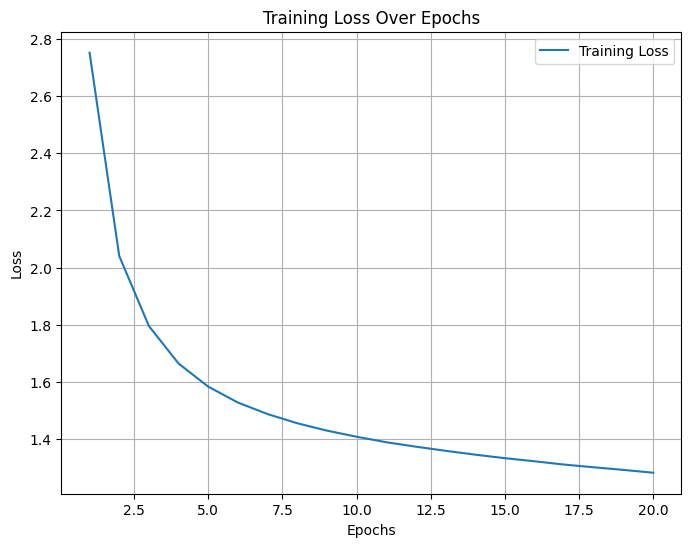

Training loss plot saved as 'training_loss_plot.png'.


In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' contains the training history from model.fit()
loss = history.history['loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.savefig('training_loss_plot.png')  # Save the plot to a file
plt.show()

print("Training loss plot saved as 'training_loss_plot.png'.")


### Documenting the Model Summary:

In [ ]:
# Save the model summary to a text file for inclusion in your documentation
with open('model_summary.txt', 'w') as f:
    model.summary(print_fn=lambda x: f.write(x + '\n'))

print("Model summary saved as 'model_summary.txt'.")


Model summary saved as 'model_summary.txt'.


### Generating a Sample Text and Saving It:

In [ ]:
# Generate a sample text using the text generation function from Part V
seed_text = "ROMEO: "
generated_text = generate_text(model, seed_text, generation_length=300)
print("Generated Text:\n", generated_text)

# Save the generated text to a file
with open('generated_text_sample.txt', 'w') as f:
    f.write(generated_text)

print("Sample generated text saved as 'generated_text_sample.txt'.")


Generated Text:
 ROMEO: heaven,
That Norfolk is your love of me
Your pain of many head!

Nurse:
Here must have, yourselves, and tell you, have I.

Servant:
And leave me spoken; but with with they cried--
With those that you better meers it not stpain.
Help the winded closes and courage, and my hand.

PETRUCHIO:
Apt:
Thesef
Sample generated text saved as 'generated_text_sample.txt'.


Declaration

I, Suraj Didwagh, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link:  https://github.com/surajdidwagh/Lab-Assignment-5.2.git

Signature: Suraj Didwagh

